In [133]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [53]:
import matplotlib.style as style
style.use('classic')

https://sites.google.com/site/mexicanmillionmodels/

In [2]:
co = pymysql.connect(host='132.248.3.66', db='3MdB', 
                     user='OVN_user', passwd='oiii5007') 

In [134]:
res = pd.read_sql("""SELECT 
O__3__5007A as O3,
N__2__6584A  as N2,
H__1__4861A as Hb,
H__1__6563A as Ha,
OXYGEN as O,
NITROGEN as N,
logU_mean,
Hbfrac
FROM tab 
WHERE ref like 'BOND' 
""", 
con=co)

In [4]:
print(len(res))

31500


In [31]:
res[0:10]

,O3,N2,Hb,Ha,O,N,logU_mean,Hbfrac,age
0,1.844398e+29,1.295428e+29,8.914812e+30,2.616447e+31,-4.6,-6.6,-4.09631,1.000000,5000000.0
1,1.705977e+29,2.558449e+28,1.612372e+30,4.622029e+30,-4.6,-6.6,-3.51972,0.180864,5000000.0
2,1.810629e+29,5.602195e+28,3.508882e+30,1.016111e+31,-4.6,-6.6,-3.74787,0.393601,5000000.0
3,7.575677e+30,1.204570e+30,2.836401e+32,8.294661e+32,-5.2,-7.2,-3.55897,1.000000,6000000.0
4,7.166844e+29,8.611653e+29,8.652724e+30,2.548516e+31,-3.6,-5.6,-4.05397,1.000000,3000000.0
5,1.833993e+29,7.889549e+28,5.075374e+30,1.474868e+31,-4.6,-6.6,-3.85687,0.569319,5000000.0
6,6.336491e+30,1.827229e+29,5.251121e+31,1.498095e+32,-5.2,-7.2,-3.05364,0.185133,6000000.0
7,1.842915e+29,1.056877e+29,7.023710e+30,2.048240e+31,-4.6,-6.6,-3.95936,0.787870,5000000.0
8,6.475952e+29,1.517869e+29,1.639918e+30,4.760025e+30,-3.6,-5.6,-3.48047,0.189526,3000000.0
9,7.268668e+30,4.754339e+29,1.124288e+32,3.238668e+32,-5.2,-7.2,-3.27183,0.396378,6000000.0


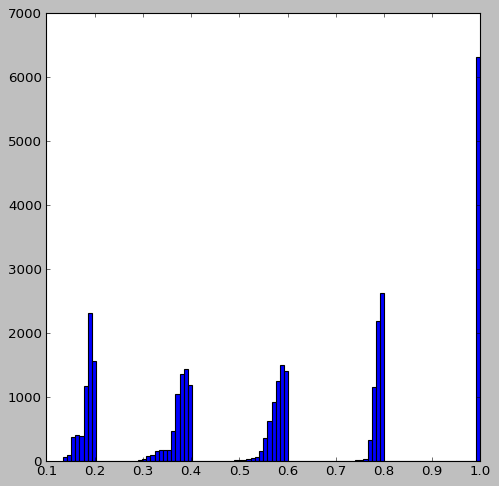

In [73]:
f, ax = plt.subplots(figsize=(7,7))
ax.hist(res['Hbfrac'], bins=100);

In [135]:
mask = res['Hbfrac'] > 0.7
res2 = res[mask]
print(len(res2))

12600


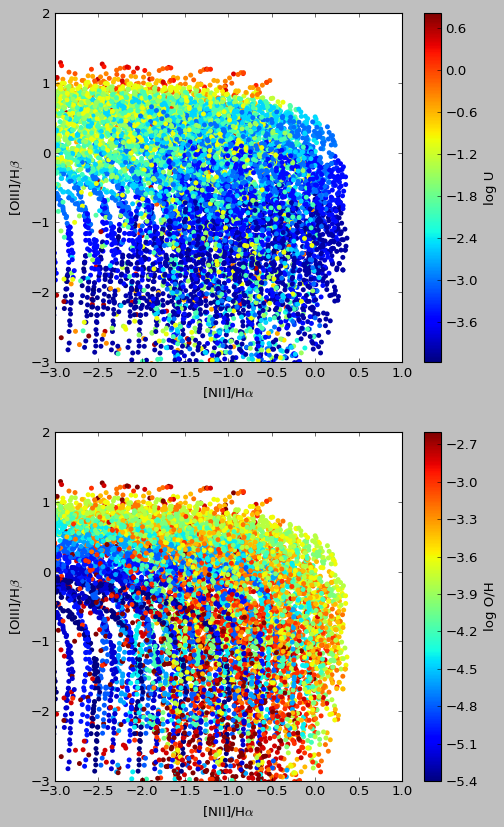

In [75]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(7,12))
cax1 = ax1.scatter(np.log10(res2['N2']/res2['Ha']), 
           np.log10(res2['O3']/res2['Hb']), 
           edgecolor='', c=res2['logU_mean'])
cb1 = plt.colorbar(cax1, ax=ax1)
cb1.set_label('log U')
cax2 = ax2.scatter(np.log10(res2['N2']/res2['Ha']), 
           np.log10(res2['O3']/res2['Hb']), 
           edgecolor='', c=res2['O'])
cb2 = plt.colorbar(cax2, ax=ax2)
cb2.set_label('log O/H')
for ax in (ax1, ax2):
    ax.set_xlabel(r'[NII]/H$\alpha$')
    ax.set_ylabel(r'[OIII]/H$\beta$')
    ax.set_xlim((-3,1))
    ax.set_ylim((-3,2))

## 2nd example

In [118]:
res4 = pd.read_sql("""SELECT 
HE_2__4686A as He2, 
TOTL__3727A as O2, 
O__3__5007A as O3,
TOTL__4363A as O3a,
REC___4363A as O3ar,
N__2__6584A  as N2,
O__1__6300A  as O1, 
O__1_6317M as O1IR,
O__3_8833M as O3IR,
(S_II__6716A +  S_II__6731A ) as S2,
H__1__4861A as Hb,
H__1__6563A as Ha,
OXYGEN as O,
NITROGEN as N,
logU_mean,
Hbfrac,
T_HYDROGEN_vol_1 as Te, 
SUBSTRING(com3, 6) as age,
nH_mean as nH
FROM v_3MdB 
WHERE ref like 'BOND' AND hbfrac > 0.8 
""", 
con=co)

In [119]:
# res.age is a string, tranform it to float:
res4 = res4.apply(pd.to_numeric, errors='ignore')

In [95]:
print(len(res4))

6300


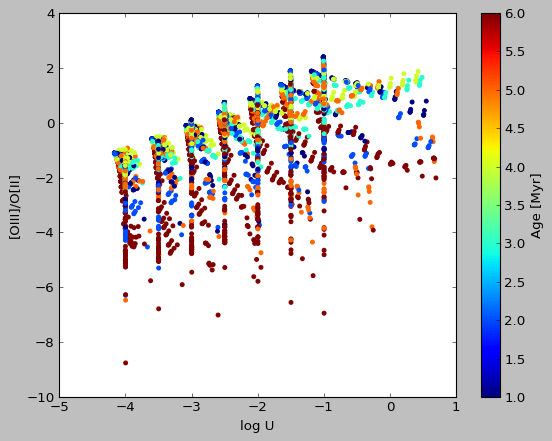

In [97]:
f, ax = plt.subplots()
cax = ax.scatter(res4['logU_mean'], 
           np.log10(res4['O3']/res4['O2']),
          c=res4['age']/1e6, edgecolor='');
ax.set_xlabel('log U')
ax.set_ylabel('[OIII]/O[II]')
cb = plt.colorbar(cax)
cb.set_label('Age [Myr]')

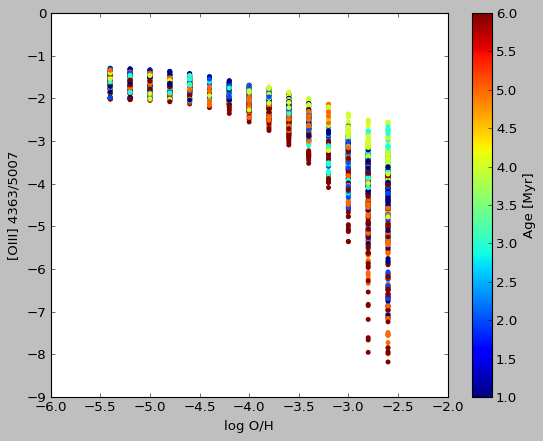

In [98]:
f, ax = plt.subplots()
cax = ax.scatter(res4['O'], 
           np.log10(res4['O3a']/res4['O3']),
          c=res4['age']/1e6, edgecolor='');
ax.set_xlabel('log O/H')
ax.set_ylabel('[OIII] 4363/5007')
cb = plt.colorbar(cax)
cb.set_label('Age [Myr]')

/Users/christophemorisset/anaconda/envs/py3k6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/christophemorisset/anaconda/envs/py3k6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


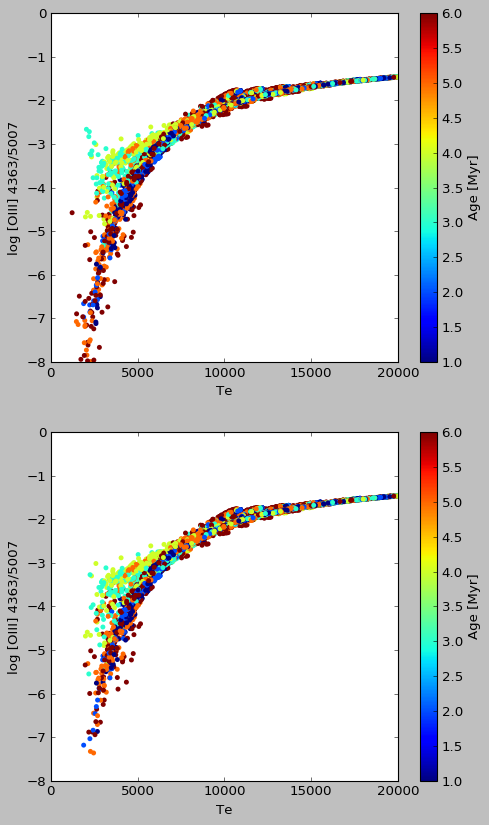

In [131]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(7,12))
cax1 = ax1.scatter(res4['Te'], 
           np.log10((res4['O3a'])/res4['O3']),
          c=res4['age']/1e6, edgecolor='');
ax1.set_xlabel('Te')
ax1.set_ylabel('log [OIII] 4363/5007')
cb1 = plt.colorbar(cax1, ax=ax1)
cb1.set_label('Age [Myr]')
ax1.set_xlim((0, 20000))
ax1.set_ylim((-8, 0))
cax2 = ax2.scatter(res4['Te'], 
           np.log10((res4['O3a']-res4['O3ar'])/res4['O3']),
          c=res4['age']/1e6, edgecolor='');
ax2.set_xlabel('Te')
ax2.set_ylabel('log [OIII] 4363/5007')
cb2 = plt.colorbar(cax2, ax=ax2)
cb2.set_label('Age [Myr]')
ax2.set_xlim((0, 20000))
ax2.set_ylim((-8, 0));

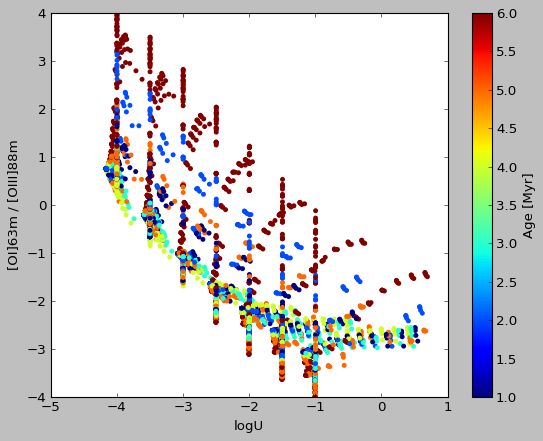

In [113]:
f, ax = plt.subplots()
cax = ax.scatter(res4['logU_mean'], 
           np.log10(res4['O1IR']/res4['O3IR']),
          c=res4['age']/1e6, edgecolor='');
ax.set_xlabel('logU')
ax.set_ylabel('[OI]63m / [OIII]88m')
cb = plt.colorbar(cax)
cb.set_label('Age [Myr]')
ax.set_xlim((-5, 1))
ax.set_ylim((-4, 4));

420


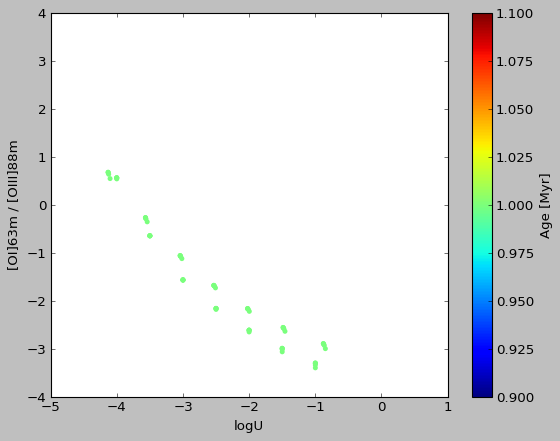

In [132]:
# Let's restrict the age and the abundance of the models
mask_age = res4['age'] == 1e6
mask_ab = res4['O'] == -4
print(mask_ab.sum())
mask = mask_age & mask_ab
res4b = res4[mask]
f, ax = plt.subplots()
cax = ax.scatter(res4b['logU_mean'], 
           np.log10(res4b['O1IR']/res4b['O3IR']),
          c=res4b['age']/1e6, edgecolor='');
ax.set_xlabel('logU')
ax.set_ylabel('[OI]63m / [OIII]88m')
cb = plt.colorbar(cax)
cb.set_label('Age [Myr]')
ax.set_xlim((-5, 1))
ax.set_ylim((-4, 4));

## Other example

#### Using the PNe_2014 project to explore the relation between the O++ and N+ temperatures

In [18]:
res3 = pd.read_sql("""SELECT 
OXYGEN as O, 
T_OXYGEN_vol_2 as TOpp, 
T_NITROGEN_vol_1 as TNp, 
logU_mean as logU 
FROM v_3MdB 
WHERE ref = 'PNe_2014' AND com6 = 1 AND hbfrac > 0.7""", 
                  con=co)

In [21]:
print(len(res3))

84237


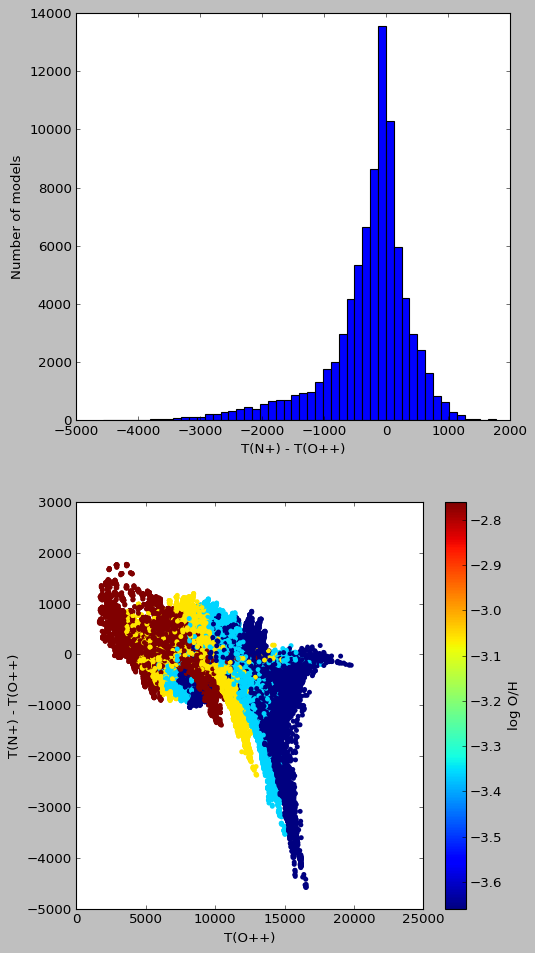

In [70]:
f, (ax2, ax1) = plt.subplots(2,1, figsize=(7,14))
cax1=ax1.scatter(res3['TOpp'], res3['TNp']-res3['TOpp'], c=res3['O'], 
                 edgecolor='') 
cax2=ax2.hist(res3['TNp']-res3['TOpp'], bins=50)
ax1.set_xlabel('T(O++)')
ax1.set_ylabel('T(N+) - T(O++)')
ax2.set_xlabel('T(N+) - T(O++)')
ax2.set_ylabel('Number of models')
cb1 = plt.colorbar(cax1, ax=ax1);
cb1.set_label('log O/H')

In [17]:
co.close()